## Learning CNNs using Fashion-MNIST

This assignment will bulld CNNS using the Fashion-MINST dataset. In particular, we will
*   Use MNIST Fashion to study CNN architectures and parameters.

Read more about the Fashion-MINST dataset in this paper [here](https://arxiv.org/abs/1708.07747) (**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms**)



## Name: Akshay Javagal Somashekhar
### Student Id: 120221054

## Assignment Overview


This assignment focuses on how to classify **fashion_mnist** data with a simple **Convolutional Neural Network** in Keras. 
Keras is part of the core TensorFlow library, in addition to being an independent open source project. 

The [fashion_mnist](https://github.com/zalandoresearch/fashion-mnist) dataset consists of 
60,000 train and 10,000 test instances. The aim is to classify an image into one of 10 categories. The possible categories/labals are:

<br> **Label**	**Description**
<br> 0 T-shirt/top
<br> 1 Trouser
<br> 2 Pullover
<br> 3 Dress
<br> 4 Coat
<br> 5 Sandal
<br> 6 Shirt
<br> 7 Sneaker
<br> 8 Bag
<br> 9 Ankle boot

Each gray-scale input is a 28x28 low-resolution image.

>>[Learning CNNs using Fashion-MNIST](#scrollTo=XLMRPLVCFwEc)

>>[Notebook Overview](#scrollTo=Ixyte299ZZgk)

>>[Download the fashion_mnist data](#scrollTo=LbCigZtNZZgl)

>>[Visualize the data](#scrollTo=tWORMSC8FDR4)

>>[Data normalization](#scrollTo=Zx-Ee6LHZZgt)

>>[Split the data into train/validation/test data sets](#scrollTo=CFlNHktHBtru)

>>[Create the basic model architecture](#scrollTo=HhalcO03ZZg3)

>>[Compile the model](#scrollTo=FhxJ5dinZZg8)

>>[Train the model](#scrollTo=DtOvh3YVZZg_)

>>[Load Model with the best validation accuracy](#scrollTo=e-MGLwZQy05d)

>>[Test Accuracy](#scrollTo=9RTRkan4yq5H)

>>[Visualize prediction](#scrollTo=oJv7XEk10bOv)

>>[Congragulations!](#scrollTo=8AehWdRAVKN5)



## Download the fashion_mnist data
First let's install TensorFlow version 1.8.0 and import Tensorflow. Then we download fashion-mnist which is one of the Keras datasets. 

In [1]:
import random
random.seed(7)

In [2]:
!pip install -q -U tensorflow>=1.8.0
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Visualize the data

x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


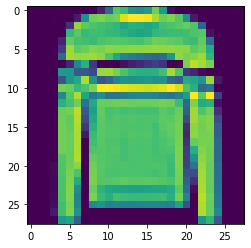

In [3]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

## Data normalization
Normalize the data dimensions so that they are of approximately the same scale.

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


## Split the data into train/validation/test data sets


*   Training data - used for training the model
*   Validation data - used for tuning the hyperparameters and evaluate the models
*   Test data - used to test the model after the model has gone through initial vetting by the validation set.



In [6]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


## Create the basic model architecture

There are two APIs for defining a model in Keras:
1. [Sequential model API](https://keras.io/models/sequential/)
2. [Functional API](https://keras.io/models/model/)

In this assignment we are using the Sequential model API. 
If you are interested in a tutorial using the Functional API, checkout Sara Robinson's blog [Predicting the price of wine with the Keras Functional API and TensorFlow](https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03).

In defining the model we will be using some of these Keras APIs:
*   Conv2D() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D/) - create a convolutional layer 
*   Pooling() [link text](https://keras.io/layers/pooling/) - create a pooling layer 
*   Dropout() [link text](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) - apply drop out 

In the basic architecture we create two convolutional layers, and then an inference layer. 

The key parameters for a convolution layer are: 
for convolution--(a) number of convolution filters; (b) kernel size;
for pooling--kernel for pooling-size;
for dropout--dropout probability. We will refer to these as the convolution-layer parameters.

The inference-layer parameters are:
(a) hidden layer vector-size and activation;
(b) dropout probability;
(c) output-layer activation.

When we design a network we can specify the CNN model using these parameters.

In [7]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

## Compile the model
Configure the learning process with compile() API before training the model. It receives three arguments:

*   An optimizer 
*   A loss function 
*   A list of metrics 


In [8]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Train the model

Now let's train the model with fit() API.

We use  the [ModelCheckpoint](https://keras.io/callbacks/#modelcheckpoint) API to save the model after every epoch. Set "save_best_only = True" to save only when the validation accuracy improves.


In [9]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=False)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=checkpointer)

Epoch 1/10
860/860 [==============================] - 7s 5ms/step - loss: 0.8399 - accuracy: 0.6896 - val_loss: 0.3797 - val_accuracy: 0.8644

Epoch 00001: saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 4s 4ms/step - loss: 0.4377 - accuracy: 0.8437 - val_loss: 0.3428 - val_accuracy: 0.8750

Epoch 00002: saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 4s 4ms/step - loss: 0.3838 - accuracy: 0.8603 - val_loss: 0.3091 - val_accuracy: 0.8874

Epoch 00003: saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 4s 4ms/step - loss: 0.3474 - accuracy: 0.8735 - val_loss: 0.2755 - val_accuracy: 0.8990

Epoch 00004: saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [==============================] - 4s 4ms/step - loss: 0.3252 - accuracy: 0.8820 - val_loss: 0.2626 - val_accuracy: 0.9062

Epoch 00005: saving model to model.weights.best.hdf5
Epoch 6/10
860/860 [

## Load Model with the best validation accuracy

In [10]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## Test Accuracy

In [11]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9089999794960022


## Visualize prediction
Now let's visualize the prediction using the model you just trained. 
First we get the predictions with the model from the test data.
Then we print out 15 images from the test data set, and set the titles with the prediction (and the groud truth label).
If the prediction matches the true label, the title will be green; otherwise it's displayed in red.

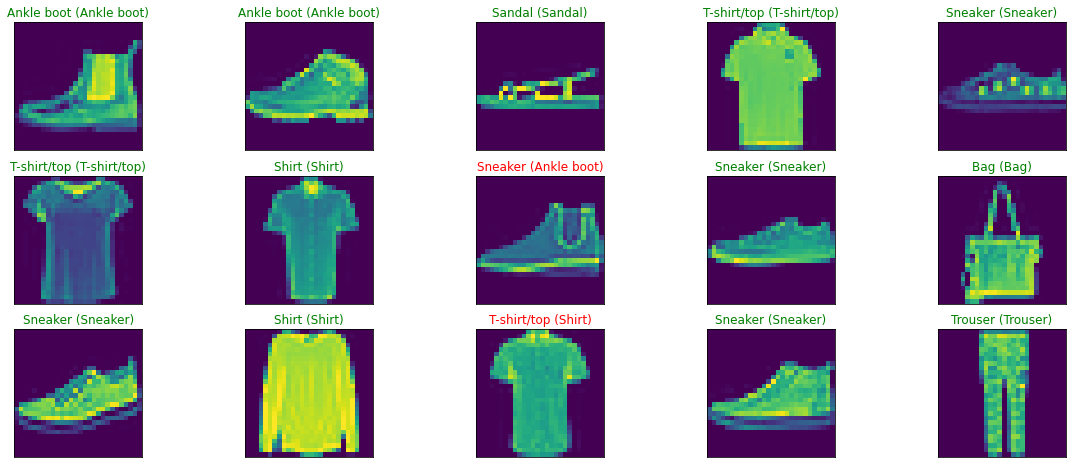

In [12]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

## Task 1: Architecture Comparison
The code given above is called the baseline architecture, and will successfully train a CNN to classify fashion-MNIST with near 90% accuracy.
We now want to compare other different architectures.

Each group must run 10 additional architectures:


*   2 different combination of number of filters
*   2 different combinations of kernels for (convolution, pooling)
*   2 different dropout probability values
*   1 new architecture with more layers
*   3 experiments with combined changes

Report the results in a table with the first column describing the architecture and the second column the predictive accuracy of the model on the data.

Describe how the changes to architecture influence the change in accuracy, if there is any significant change. Specifically, describe:
* impact of number of filters
* impact of kernel size
* impact of dropout probability
* impact of number of layers
* impact of combining multiple changes.




## Group 2 - Task 1: Single-parameter-type modification (6 trails)

In [13]:
def create_model(filters,kernels,pool_size,dropouts):
  model = tf.keras.Sequential()

  # Must define the input shape in the first layer of the neural network
  model.add(tf.keras.layers.Conv2D(filters=filters[0], kernel_size=kernels[0], padding='same', activation='relu', input_shape=(28,28,1))) 
  model.add(tf.keras.layers.MaxPooling2D(pool_size=pool_size[0]))
  model.add(tf.keras.layers.Dropout(dropouts[0]))

  model.add(tf.keras.layers.Conv2D(filters=filters[1], kernel_size=kernels[1], padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=pool_size[1]))
  model.add(tf.keras.layers.Dropout(dropouts[1]))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  return model

In [14]:
model_parameters = {}
model_parameters['model_base'] = [(64,32),(2,2),(2,2),(0.3,0.3)]
model_parameters['model_filter_tryout1'] = [(128,64),(2,2),(2,2),(0.3,0.3)]
model_parameters['model_filter_tryout2'] = [(64,64),(2,2),(2,2),(0.3,0.3)]
model_parameters['model_kernel_tryout1'] = [(64,32),(5,5),(2,2),(0.3,0.3)]
model_parameters['model_kernel_tryout2'] = [(64,32),(3,3),(2,2),(0.3,0.3)]
model_parameters['model_droput_tryout1'] = [(64,32),(2,2),(2,2),(0.4,0.4)]
model_parameters['model_droput_tryout2'] = [(64,32),(2,2),(2,2),(0.25,0.25)]

In [15]:
accuracy_scores = {}
number_of_parameters = {}

# Performing different set of tryout by changing hyper parameters
for name,parameters in model_parameters.items():
  filters = parameters[0]
  kernels = parameters[1]
  pool_size = parameters[2]
  dropouts = parameters[3]
  model = create_model(filters,kernels,pool_size,dropouts)
  model.summary()

  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
  
  checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
  model.fit(x_train,
          y_train,
          batch_size=64,
          epochs=10,
          validation_data=(x_valid, y_valid),
          callbacks=[checkpointer])
  model.load_weights('model.weights.best.hdf5')
  score = model.evaluate(x_test, y_test, verbose=0)
  accuracy_scores[name] = score[1]
  number_of_parameters[name] = model.count_params()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)             

## Group 2 - Task 2: Adding Extra layer to the base architecture

In [16]:
model_parameters['Extra layered architecture'] = [(64,32,32,32),(2,2,2,2),(2,2,2,2),(0.3,0.3,0.3,0.3)]

In [17]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

# Extra Layer 1:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

# Extra Layer 2:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 7, 7, 32)         

In [18]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
        y_train,
        batch_size=64,
        epochs=10,
        validation_data=(x_valid, y_valid),
        callbacks=[checkpointer])
model.load_weights('model.weights.best.hdf5')
score = model.evaluate(x_test, y_test, verbose=0)
accuracy_scores['Extra layered architecture'] = score[1]
number_of_parameters['Extra layered architecture'] = model.count_params()


Epoch 1/10
860/860 [==============================] - 5s 5ms/step - loss: 1.0405 - accuracy: 0.6004 - val_loss: 0.4161 - val_accuracy: 0.8468

Epoch 00001: val_loss improved from inf to 0.41606, saving model to model.weights.best.hdf5
Epoch 2/10
860/860 [==============================] - 4s 5ms/step - loss: 0.5060 - accuracy: 0.8143 - val_loss: 0.3512 - val_accuracy: 0.8712

Epoch 00002: val_loss improved from 0.41606 to 0.35124, saving model to model.weights.best.hdf5
Epoch 3/10
860/860 [==============================] - 4s 5ms/step - loss: 0.4306 - accuracy: 0.8431 - val_loss: 0.3107 - val_accuracy: 0.8834

Epoch 00003: val_loss improved from 0.35124 to 0.31066, saving model to model.weights.best.hdf5
Epoch 4/10
860/860 [==============================] - 4s 5ms/step - loss: 0.4000 - accuracy: 0.8496 - val_loss: 0.2961 - val_accuracy: 0.8840

Epoch 00004: val_loss improved from 0.31066 to 0.29608, saving model to model.weights.best.hdf5
Epoch 5/10
860/860 [============================

## Group 2 - Task 3: Multiple Architecture Moddifications

In [19]:
model_architecture_parameters = {}
model_architecture_parameters['Architecture_1'] = [(32,32),(4,4),(2,2),(0.3,0.3)]
model_architecture_parameters['Architecture_2'] = [(32,32),(5,5),(2,2),(0.2,0.3)]
model_architecture_parameters['Architecture_3'] = [(64,64),(2,2),(2,2),(0.3,0.3)]
model_architecture_parameters['Architecture_4'] = [(64,64),(5,5),(3,3),(0.4,0.3)]

In [20]:
# Iterating for each architecture
for name,parameters in model_architecture_parameters.items():
  filters = parameters[0]
  kernels = parameters[1]
  pool_size = parameters[2]
  dropouts = parameters[3]

  model = create_model(filters,kernels,pool_size,dropouts)
  model.summary()

  model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
  
  checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
  model.fit(x_train,
          y_train,
          batch_size=64,
          epochs=10,
          validation_data=(x_valid, y_valid),
          callbacks=[checkpointer])
  model.load_weights('model.weights.best.hdf5')
  score = model.evaluate(x_test, y_test, verbose=0)
  accuracy_scores[name] = score[1]
  number_of_parameters[name] = model.count_params()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        544       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 32)        16416     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1568)             

## Tabular form displaying accuracies for each of the 11 models tried

In [21]:
import pandas as pd
columns_params = ['Conv Layer Filters', 'Kernel size parametes', 'Pooling Sizes', 'dropout parameters']
model_params = pd.DataFrame.from_dict(model_parameters, orient='index', columns=columns_params)
model_architecture_params = pd.DataFrame.from_dict(model_architecture_parameters, orient='index', columns=columns_params)
result_table = pd.concat([model_params,model_architecture_params])
result_table['Number of parameters in model'] = pd.DataFrame.from_dict(number_of_parameters, orient = 'index')
result_table['Accuracy Scores'] = pd.DataFrame.from_dict(accuracy_scores, orient = 'index')

In [22]:
result_table

,Conv Layer Filters,Kernel size parametes,Pooling Sizes,dropout parameters,Number of parameters in model,Accuracy Scores
model_base,"(64, 32)","(2, 2)","(2, 2)","(0.3, 0.3)",412778,0.9121
model_filter_tryout1,"(128, 64)","(2, 2)","(2, 2)","(0.3, 0.3)",839114,0.9131
model_filter_tryout2,"(64, 64)","(2, 2)","(2, 2)","(0.3, 0.3)",822410,0.9126
model_kernel_tryout1,"(64, 32)","(5, 5)","(2, 2)","(0.3, 0.3)",457130,0.9113
model_kernel_tryout2,"(64, 32)","(3, 3)","(2, 2)","(0.3, 0.3)",423338,0.9130
model_droput_tryout1,"(64, 32)","(2, 2)","(2, 2)","(0.4, 0.4)",412778,0.9002
model_droput_tryout2,"(64, 32)","(2, 2)","(2, 2)","(0.25, 0.25)",412778,0.9077
Extra layered architecture,"(64, 32, 32, 32)","(2, 2, 2, 2)","(2, 2, 2, 2)","(0.3, 0.3, 0.3, 0.3)",421034,0.9008
Architecture_1,"(32, 32)","(4, 4)","(2, 2)","(0.3, 0.3)",421194,0.9161
Architecture_2,"(32, 32)","(5, 5)","(2, 2)","(0.2, 0.3)",430698,0.9145


## Experimental Observations:

### 1.   Accuracy:
> Accuracy for most the models stayed at around 91% with validation loss hovering around 0.21. This is due to the fact that the given MNIST dataset is a finely preprocessed dataset. The base architecture gave 90.7% accuracy

### 2. Comparison between the filter_tryout1 and filter_tryout2:
> filter_tryout1: First Convolution layer filter size = 128, 
Second Convolution layer filter size = 64 ; filter_tryout2: First Convolution layer filter size = 64, 
Second Convolution layer filter size = 64;

> Higher the number of filters, more features can be extracted. However, much high number of filters will  slows down the model training. In this model, there was not much of a difference observed when compared to the base architecture.

### 3. Comparison between the kernel_tryout1 and kernel_tryout2:
> kernel_tryout1: First Convolution layer kernel size = 5, 
Second Convolution layer kernel size = 5 ; kernel_tryout2: First Convolution layer kernel size = 3, 
Second Convolution layer kernel size = 3;

> Picking odd number kernels helps to prevent unnecessary distortions. Accuracy didnot change significantly due to the fact that the model is already giving best results.

### 3. Comparison between the dropout_tryout1 and dropout_tryout2:
> dropout_tryout1: First Convolution layer dropout size = 5, 
Second Convolution layer dropout size = 5 ; dropout_tryout2: First Convolution layer dropout size = 3, 
Second Convolution layer dropout size = 3;

> With the increase in dropout size, the computational efficiency increases. However, there might be slight dip in accuracy

### 4.   Additional extra 2 layers:
Key Note: I have not used Maxpool layer for the additional layer as it tries to supress the features developed in previous layers.

> Additional extra layer didnot help in the accuracy as the neural network tends to overfitting. Thus increase in validation loss was observed and resulted in 1% decrease in model accuracy. Use of dropout layers in additional layers furthur degraded the performance of the already-overfit model.

### 5. Trout with different architectures:
> Different combination of kernel and filter sizes, maxpool layers and dropouts were carried out. Metrics Accuracy and validation loss didnot change significantly. However, one change could be the number of trainable parameters for each architecture. Architecture_3 has double the number of parameters when compared to other architectures. However, this didnot affect much in training accuracy and loss computation.

### 6. Final Conclusion:
Computational Efficiency becomes more important when it comes to datasets like MNIST. Thus, any model amomng the above tryouts which consumes less computational power and able to extract more features can be taken as the best fit architecture.



